In [49]:
import pandas as pd
from plotnine import *
from plotnine.data import *
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

dfDaily = pd.read_csv('data/wikipediaStatSampleDaily.csv',sep=",",error_bad_lines=False)
#df = df[df['#totalNonWildcardValues'].notnull()]
dfDaily['granularity'] = 'daily'
dfWeekly = pd.read_csv('data/wikipediaStatSampleWeekly.csv',sep=",",error_bad_lines=False)
dfWeekly['granularity'] = 'weekly'
df = dfDaily.append(dfWeekly)
print(df.dtypes)
print(len(df.index))
display(df)

infoboxTemplate                  object
pageID                            int64
infoboxKey                       object
property                         object
#totalNonWildcardValues           int64
#totalRealChanges                 int64
#nonWildcardValuesInYear_2003     int64
#nonWildcardValuesInYear_2004     int64
#nonWildcardValuesInYear_2005     int64
#nonWildcardValuesInYear_2006     int64
#nonWildcardValuesInYear_2007     int64
#nonWildcardValuesInYear_2008     int64
#nonWildcardValuesInYear_2009     int64
#nonWildcardValuesInYear_2010     int64
#nonWildcardValuesInYear_2011     int64
#nonWildcardValuesInYear_2012     int64
#nonWildcardValuesInYear_2013     int64
#nonWildcardValuesInYear_2014     int64
#nonWildcardValuesInYear_2015     int64
#nonWildcardValuesInYear_2016     int64
#nonWildcardValuesInYear_2017     int64
#nonWildcardValuesInYear_2018     int64
#realChangesInYear_2003           int64
#realChangesInYear_2004           int64
#realChangesInYear_2005           int64


,infoboxTemplate,pageID,infoboxKey,property,#totalNonWildcardValues,#totalRealChanges,#nonWildcardValuesInYear_2003,#nonWildcardValuesInYear_2004,#nonWildcardValuesInYear_2005,#nonWildcardValuesInYear_2006,...,#realChangesInYear_2010,#realChangesInYear_2011,#realChangesInYear_2012,#realChangesInYear_2013,#realChangesInYear_2014,#realChangesInYear_2015,#realChangesInYear_2016,#realChangesInYear_2017,#realChangesInYear_2018,granularity
0,infobox rugby union biography,43227667,615794096-0,relatives,64,5,0,0,0,0,...,0,0,0,0,0,1,1,1,1,daily
1,infobox settlement,136893,163515893-0,blank_name,62,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,daily
2,infobox holiday,926554,105233266-0,date_🔗_extractedLink1,24,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,daily
3,infobox_software,8837449,190955785-0,website,14,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,daily
4,infobox settlement,137012,135260449-0,subdivision_name1,17,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,daily
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,infobox indian urban area,3418314,100823462-0,image_caption_🔗_extractedLink1,46,8,0,0,0,0,...,0,0,0,3,3,1,0,0,0,weekly
999996,infobox vg,25644305,335279734-0,publisher_🔗_extractedLink2,15,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,weekly
999997,infobox single,5843425,74203259-0,type,12,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,weekly
999998,infobox journalist,7348636,80183299-0,birth_place,14,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,weekly


# Top 100 Template element counts

In [51]:
pd.set_option('display.max_rows', 100)
top100Templates = dfDaily[['infoboxTemplate','pageID']].groupby(['infoboxTemplate']).agg(['count'])['pageID'].sort_values('count',ascending=False).head(100)
top100Templates['estimatedTotalCount'] = top100Templates['count']*15
display(top100Templates)
index = top100Templates.index
a_list = list(index)
print(a_list)

,count,estimatedTotalCount
infoboxTemplate,,
infobox football biography,60430,906450
football player infobox,55750,836250
infobox settlement,52825,792375
infobox musical artist,30741,461115
infobox film,30433,456495
infobox album,30269,454035
infobox television,25971,389565
infobox single,24606,369090
album infobox,24348,365220


['infobox football biography', 'football player infobox', 'infobox settlement', 'infobox musical artist', 'infobox film', 'infobox album', 'infobox television', 'infobox single', 'album infobox', 'infobox person', 'infobox actor', 'football club infobox', 'infobox military conflict', 'infobox company', 'infobox radio station', 'infobox military person', 'infobox city', 'infobox cvg', 'infobox football biography 2', 'infobox_company', 'infobox school', 'infobox election', 'infobox officeholder', 'infobox rugby league biography', 'infobox_film', 'infobox_band', 'infobox mlb player', 'infobox military unit', 'infobox book', 'infobox automobile', 'infobox character', 'infobox football club season', 'infobox_broadcast', 'infobox ice hockey player', 'infobox station', 'infobox university', 'infobox cricketer', 'infobox tv channel', 'infobox mlb retired', 'infobox ethnic group', 'single infobox', 'infobox nba player', 'infobox nflactive', 'infobox nfl player', 'infobox vg', 'infobox writer', 

# Change Distribution

<AxesSubplot:title={'center':'Granularity: Daily'}>

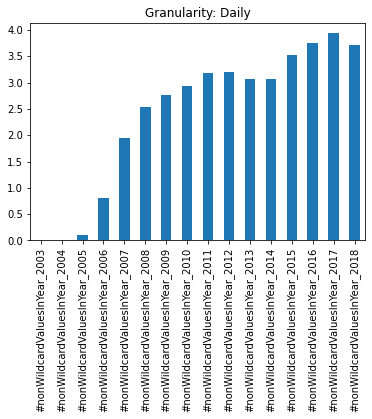

In [52]:
#average non wildcard values per year
meanNonWildcardValuesDaily = dfDaily.loc[:, '#nonWildcardValuesInYear_2003':'#nonWildcardValuesInYear_2018'].mean()
meanNonWildcardValuesDaily.plot(kind='bar',title="Granularity: Daily")
#dfDaily.loc[:, '#nonWildcardValuesInYear_2003':'#nonWildcardValuesInYear_2018'].plot(kind='box')
#ggplot(df,aes(y='#nonWildcardValuesInYear_2018',x=0))+geom_boxplot()

<AxesSubplot:title={'center':'Granularity: Weekly'}>

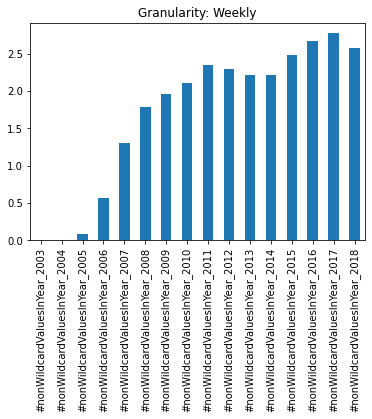

In [53]:
meanNonWildcardValuesWeekly = dfWeekly.loc[:, '#nonWildcardValuesInYear_2003':'#nonWildcardValuesInYear_2018'].mean()
meanNonWildcardValuesWeekly.plot(kind='bar',title="Granularity: Weekly")

<AxesSubplot:title={'center':'Granularity: Daily'}>

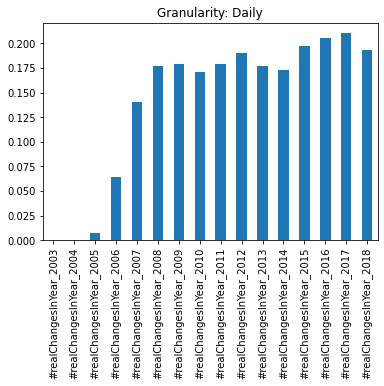

In [54]:
#'foo':'sat'
meanChangesDaily = dfDaily.loc[:, '#realChangesInYear_2003':'#realChangesInYear_2018'].mean()
meanChangesDaily.plot(kind='bar',title="Granularity: Daily")
#ggplot(meanNonWildcardValues)

<AxesSubplot:title={'center':'Granularity: Weekly'}>

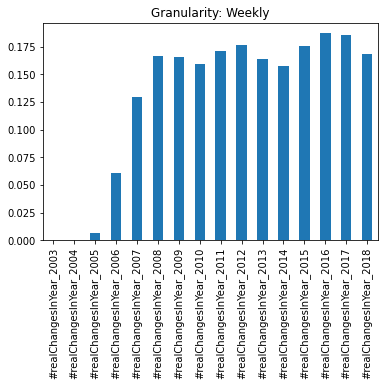

In [55]:
meanChangesWeekly = dfWeekly.loc[:, '#realChangesInYear_2003':'#realChangesInYear_2018'].mean()
meanChangesWeekly.plot(kind='bar',title="Granularity: Weekly")

# Data Denseness

/home/leon/data/dataset_versioning/plotting/plotting/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
/home/leon/data/dataset_versioning/plotting/plotting/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_histogram : Removed 88 rows containing missing values.


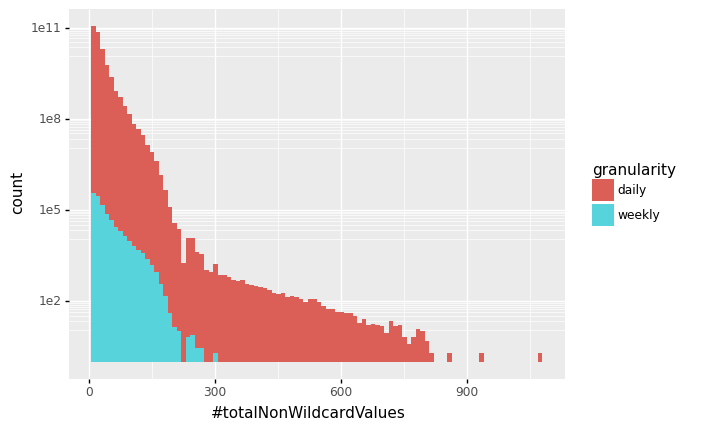

<ggplot: (8747344035319)>

In [56]:
ggplot(df, aes(x='#totalNonWildcardValues', y=after_stat('count'), fill = 'granularity')) + scale_y_log10() + geom_histogram(bins=100)

/home/leon/data/dataset_versioning/plotting/plotting/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
/home/leon/data/dataset_versioning/plotting/plotting/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_histogram : Removed 90 rows containing missing values.


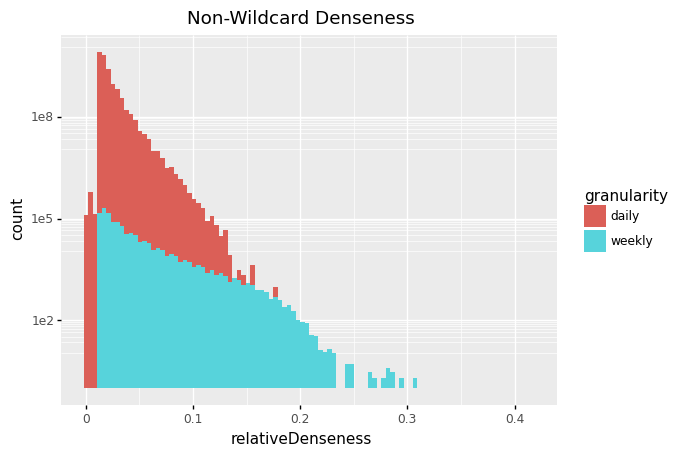

<ggplot: (8747343981828)>

In [57]:
timeAxisSize=6086

def relativeDenseness(granularity,nNoWC):
    if granularity == 'daily': return nNoWC / 6086
    else: return nNoWC / 870

df['relativeDenseness'] = df.apply(lambda x: relativeDenseness(x['granularity'],x['#totalNonWildcardValues']),axis=1)
ggplot(df, aes(x='relativeDenseness', y=after_stat('count'), fill = 'granularity')) + scale_y_log10() + geom_histogram(bins=100) + labs(title='Non-Wildcard Denseness')

# Number of Changes

/home/leon/data/dataset_versioning/plotting/plotting/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
/home/leon/data/dataset_versioning/plotting/plotting/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_histogram : Removed 133 rows containing missing values.


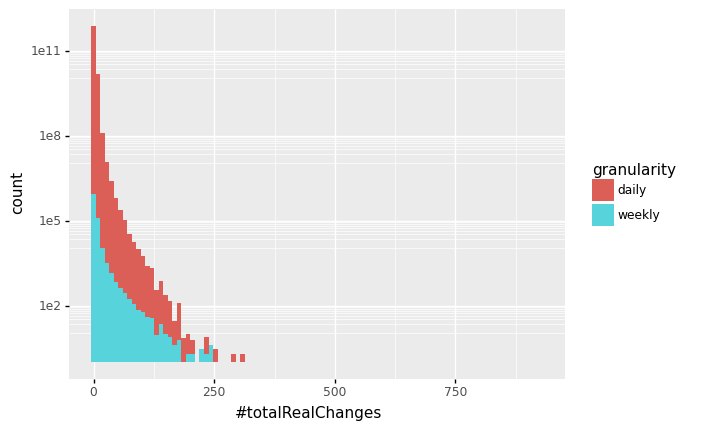

<ggplot: (8747184881999)>

In [58]:
ggplot(df, aes(x='#totalRealChanges', y=after_stat('count'), fill = 'granularity')) + scale_y_log10() + geom_histogram(bins=100)

/home/leon/data/dataset_versioning/plotting/plotting/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
/home/leon/data/dataset_versioning/plotting/plotting/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_histogram : Removed 105 rows containing missing values.


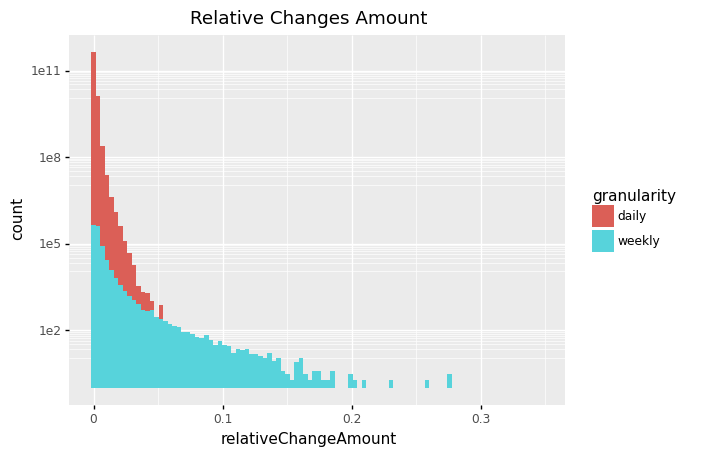

<ggplot: (8747344268295)>

In [59]:
timeAxisSize=6086

def relativeChangeAmount(granularity,nChanges):
    if granularity == 'daily': return nChanges / 6086
    else: return nChanges / 870

df['relativeChangeAmount'] = df.apply(lambda x: relativeChangeAmount(x['granularity'],x['#totalRealChanges']),axis=1)
ggplot(df, aes(x='relativeChangeAmount', y=after_stat('count'), fill = 'granularity')) + scale_y_log10() + geom_histogram(bins=100) + labs(title='Relative Changes Amount')

In [47]:
df['#totalNonWildcardValues_1'] = (df['#totalNonWildcardValues'] -1)
display(df[df['#totalNonWildcardValues_1'] != df['#totalRealChanges']])

,infoboxTemplate,pageID,infoboxKey,property,#totalNonWildcardValues,#totalRealChanges,#nonWildcardValuesInYear_2003,#nonWildcardValuesInYear_2004,#nonWildcardValuesInYear_2005,#nonWildcardValuesInYear_2006,...,#realChangesInYear_2013,#realChangesInYear_2014,#realChangesInYear_2015,#realChangesInYear_2016,#realChangesInYear_2017,#realChangesInYear_2018,granularity,relativeDenseness,relativeChangeAmount,#totalNonWildcardValues_1


# TODO: the same for weekly!